<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Numeros_Errores/Actividad03_Convergencia_Truncamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

🧮 PARTE 1: Aproximación de $\sin(x)$ para $x = \pi/4$ con serie de Maclaurin

La serie de Taylor (Maclaurin en este caso) para $\sin(x)$ es:

$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1}$$

Para $x = \frac{\pi}{4}$, vamos sumando términos hasta que el valor absoluto del término nuevo sea menor que una tolerancia $\varepsilon$, por ejemplo: $10^{-2}$, $10^{-5}$, etc.


Tolerancia: 0.1
Aproximación: 0.7046526512091675
Valor real: 0.7071067811865475
Error relativo: 0.003470663897837069
Error porcentual: 0.347066 %

Tolerancia: 0.001
Aproximación: 0.7071064695751781
Valor real: 0.7071067811865475
Error relativo: 4.406850247592559e-07
Error porcentual: 0.000044 %

Tolerancia: 1e-05
Aproximación: 0.7071067829368671
Valor real: 0.7071067811865475
Error relativo: 2.4753258115344967e-09
Error porcentual: 0.000000 %


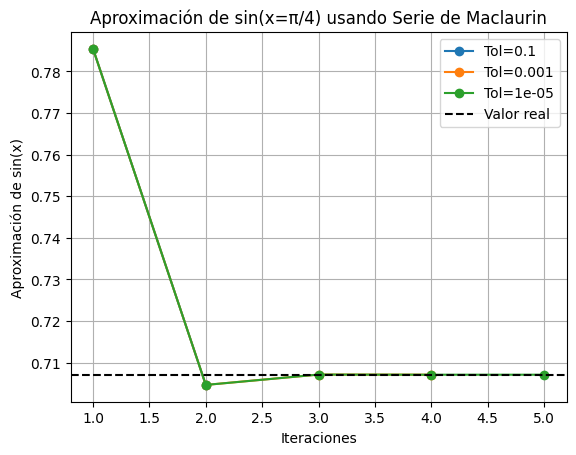

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def sin_aprox(x, tol=1e-5):
    real_value = np.sin(x)
    approx = 0
    term = x  # primer término
    n = 0
    terms = []
    errors = []

    while abs(term) >= tol:
        term = ((-1)**n) * (x**(2*n + 1)) / factorial(2*n + 1)
        approx += term
        relative_error = abs((real_value - approx) / real_value)
        terms.append(approx)
        errors.append(relative_error * 100)
        n += 1

    return approx, real_value, terms, errors

# Ejecutar para x = π/4 y diferentes tolerancias
x = np.pi / 4
tolerancias = [1e-1, 1e-3, 1e-5]
for tol in tolerancias:
    approx, real, terms, errors = sin_aprox(x, tol)
    print(f"\nTolerancia: {tol}")
    print(f"Aproximación: {approx}")
    print(f"Valor real: {real}")
    print(f"Error relativo: {abs((real - approx)/real)}")
    print(f"Error porcentual: {abs((real - approx)/real)*100:.6f} %")

    # Graficar
    plt.plot(range(1, len(terms)+1), terms, marker='o', label=f'Tol={tol}')

plt.axhline(np.sin(x), color='black', linestyle='--', label='Valor real')
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación de sin(x)')
plt.title('Aproximación de sin(x=π/4) usando Serie de Maclaurin')
plt.legend()
plt.grid(True)
plt.show()

✍️ CONCLUSIONES

•	A medida que se baja la tolerancia, se necesita más términos para lograr la aproximación.

•	La serie converge rápidamente para valores pequeños de $x$ (como $\pi/4$).

•	Se puede observar que el error disminuye exponencialmente al aumentar los términos.

🔁 PARTE 2: Aproximación de $\ln(1+x)$

La serie:

$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

Es válida para $-1 < x \le 1$.


Tolerancia: 0.1
Aproximación: 0.4166666666666667
Valor real: 0.4054651081081644
Error relativo: 0.027626442656846575
Error porcentual: 2.762644 %

Tolerancia: 0.001
Aproximación: 0.40531529017857143
Valor real: 0.4054651081081644
Error relativo: 0.0003694964784811726
Error porcentual: 0.036950 %

Tolerancia: 1e-05
Aproximación: 0.4054680819939609
Valor real: 0.4054651081081644
Error relativo: 7.334504836642051e-06
Error porcentual: 0.000733 %


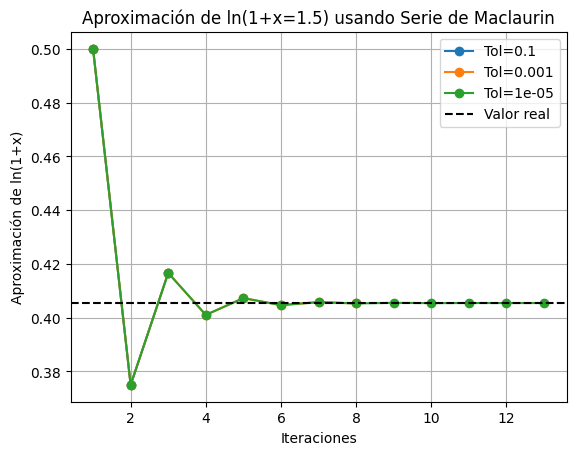

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ln1p_aprox(x, tol=1e-5):
    real_value = np.log(1 + x)
    approx = 0
    n = 1
    term = x  # primer término cuando n = 1
    terms = []
    errors = []

    while abs(term) >= tol:
        term = ((-1)**(n - 1)) * (x**n) / n
        approx += term
        relative_error = abs((real_value - approx) / real_value)
        terms.append(approx)
        errors.append(relative_error * 100)
        n += 1

    return approx, real_value, terms, errors

# Ejecutar para x = 0.5 y diferentes tolerancias
x = 0.5
tolerancias = [1e-1, 1e-3, 1e-5]
for tol in tolerancias:
    approx, real, terms, errors = ln1p_aprox(x, tol)
    print(f"\nTolerancia: {tol}")
    print(f"Aproximación: {approx}")
    print(f"Valor real: {real}")
    print(f"Error relativo: {abs((real - approx)/real)}")
    print(f"Error porcentual: {abs((real - approx)/real)*100:.6f} %")

    # Graficar aproximaciones
    plt.plot(range(1, len(terms)+1), terms, marker='o', label=f'Tol={tol}')

plt.axhline(np.log(1 + x), color='black', linestyle='--', label='Valor real')
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación de ln(1+x)')
plt.title('Aproximación de ln(1+x=1.5) usando Serie de Maclaurin')
plt.legend()
plt.grid(True)
plt.show()

• El valor de $x$ que se eligió fue 0.5 para asegurar la convergencia rápida.

•	La serie converge lentamente si $x$ está más cerca de 1 o -1.

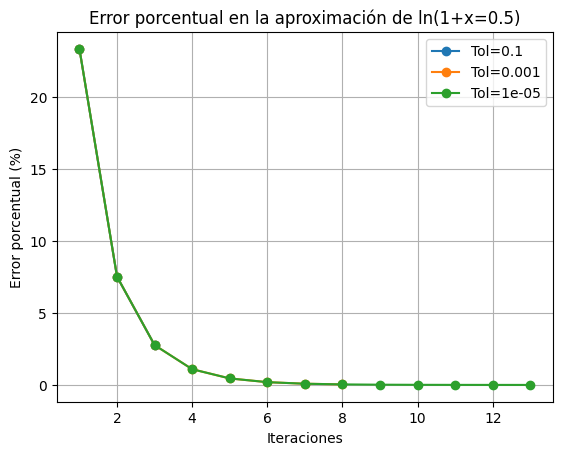

In [6]:
# Segunda gráfica: Error porcentual por iteración
plt.figure()
for tol in tolerancias:
    _, _, _, errors = ln1p_aprox(x, tol)
    plt.plot(range(1, len(errors)+1), errors, marker='o', label=f'Tol={tol}')

plt.xlabel('Iteraciones')
plt.ylabel('Error porcentual (%)')
plt.title('Error porcentual en la aproximación de ln(1+x=0.5)')
plt.legend()
plt.grid(True)
plt.show()

•	El error porcentual disminuye rápidamente con cada iteración.

•	Para tolerancias más pequeñas, el gráfico tiene más iteraciones, pero el error baja más.

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



✅ PARTE A: Aproximación para $x = 0.5$ con diferentes números de términos

Primero necesitamos una función que calcule el coeficiente binomial generalizado:

$\binom{\alpha}{n} = \frac{\alpha(\alpha-1)(\alpha-2)\cdots(\alpha - n + 1)}{n!}$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def coef_binomial(alpha, n):
    coef = 1
    for k in range(n):
        coef *= (alpha - k)
    return coef / factorial(n)

def sqrt_approx(x, num_terms):
    alpha = 0.5
    approx = 0
    approximations = []
    errors = []

    real_value = np.sqrt(1 + x)

    for n in range(num_terms):
        term = coef_binomial(alpha, n) * (x**n)
        approx += term
        approximations.append(approx)
        rel_error = abs((real_value - approx) / real_value)
        errors.append(rel_error * 100)

    return approx, real_value, approximations, errors

# Evaluar para diferentes números de términos
x = 0.5
num_terminos = 20
_, real_val, values, errores = sqrt_approx(x, num_terminos)

print(f"Valor real de sqrt(1+{x}) = {real_val:.9f}")
for i, (val, err) in enumerate(zip(values, errores), 1):
    print(f"{i:2d} términos -> Aprox: {val:.9f}, Error %: {err:.9f}")

Valor real de sqrt(1+0.5) = 1.224744871
 1 términos -> Aprox: 1.000000000, Error %: 18.350341907
 2 términos -> Aprox: 1.250000000, Error %: 2.062072616
 3 términos -> Aprox: 1.218750000, Error %: 0.489479199
 4 términos -> Aprox: 1.226562500, Error %: 0.148408754
 5 términos -> Aprox: 1.224121094, Error %: 0.050931231
 6 términos -> Aprox: 1.224975586, Error %: 0.018837764
 7 términos -> Aprox: 1.224655151, Error %: 0.007325609
 8 términos -> Aprox: 1.224781036, Error %: 0.002952859
 9 términos -> Aprox: 1.224729896, Error %: 0.001222769
10 términos -> Aprox: 1.224751204, Error %: 0.000517076
11 términos -> Aprox: 1.224742148, Error %: 0.000222358
12 términos -> Aprox: 1.224746059, Error %: 0.000096943
13 términos -> Aprox: 1.224744348, Error %: 0.000042751
14 términos -> Aprox: 1.224745105, Error %: 0.000019037
15 términos -> Aprox: 1.224744767, Error %: 0.000008547
16 términos -> Aprox: 1.224744919, Error %: 0.000003865
17 términos -> Aprox: 1.224744850, Error %: 0.000001759
18 térm

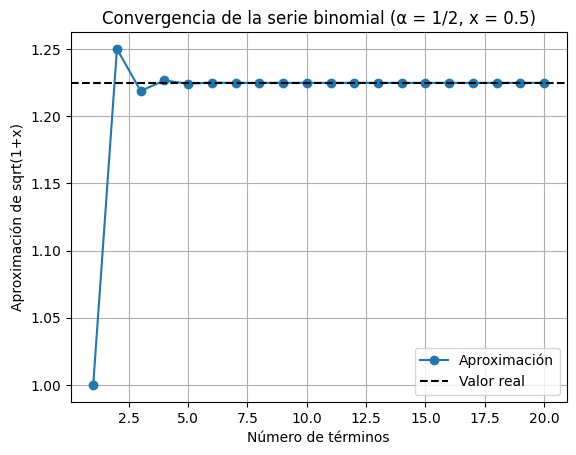

In [9]:
# Gráfico de convergencia
plt.plot(range(1, num_terminos + 1), values, marker='o', label='Aproximación')
plt.axhline(real_val, color='black', linestyle='--', label='Valor real')
plt.xlabel('Número de términos')
plt.ylabel('Aproximación de sqrt(1+x)')
plt.title('Convergencia de la serie binomial (α = 1/2, x = 0.5)')
plt.legend()
plt.grid(True)
plt.show()

Tolerancia 1e-01: se necesitan 2 términos
Tolerancia 1e-02: se necesitan 3 términos
Tolerancia 1e-03: se necesitan 5 términos
Tolerancia 1e-04: se necesitan 7 términos
Tolerancia 1e-05: se necesitan 10 términos
Tolerancia 1e-06: se necesitan 12 términos


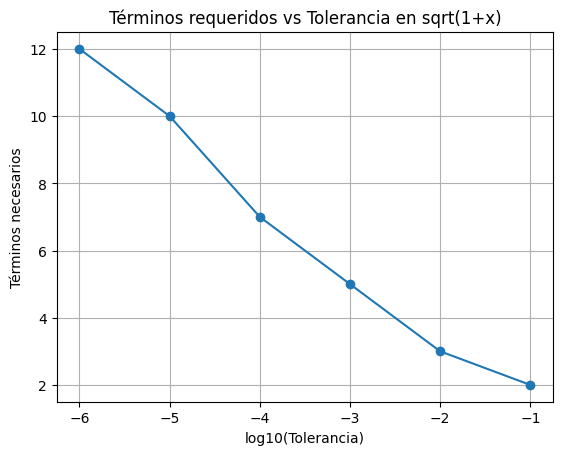

In [10]:
tolerancias = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
term_needed = []

for tol in tolerancias:
    approx = 0
    n = 0
    real = np.sqrt(1 + x)
    while True:
        term = coef_binomial(0.5, n) * (x**n)
        approx += term
        rel_error = abs((real - approx) / real)
        if rel_error < tol:
            break
        n += 1
    term_needed.append(n + 1)  # +1 porque comienza en 0

# Mostrar resultados
for tol, n in zip(tolerancias, term_needed):
    print(f"Tolerancia {tol:.0e}: se necesitan {n} términos")

# Gráfica del número de términos necesarios vs tolerancia
plt.figure()
plt.plot([np.log10(t) for t in tolerancias], term_needed, marker='o')
plt.xlabel('log10(Tolerancia)')
plt.ylabel('Términos necesarios')
plt.title('Términos requeridos vs Tolerancia en sqrt(1+x)')
plt.grid(True)
plt.show()

•	La serie converge rápidamente para $x = 0.5$.

•	Con unos pocos términos se alcanza una precisión bastante buena.

•	El número de términos crece logarítmicamente al disminuir la tolerancia.